#Phase-5: Deployment and Productionization

Planned to deploy the Bert Semantic search model that was built in Phase-3. But, BertClient() is not working now. It keeps on loading indefinitely. Tried changing the reuntime to GPU and TPU, but still it is not working. So, the only option at this moment is to deploy the GPT-3 model that was built in Phase-4.

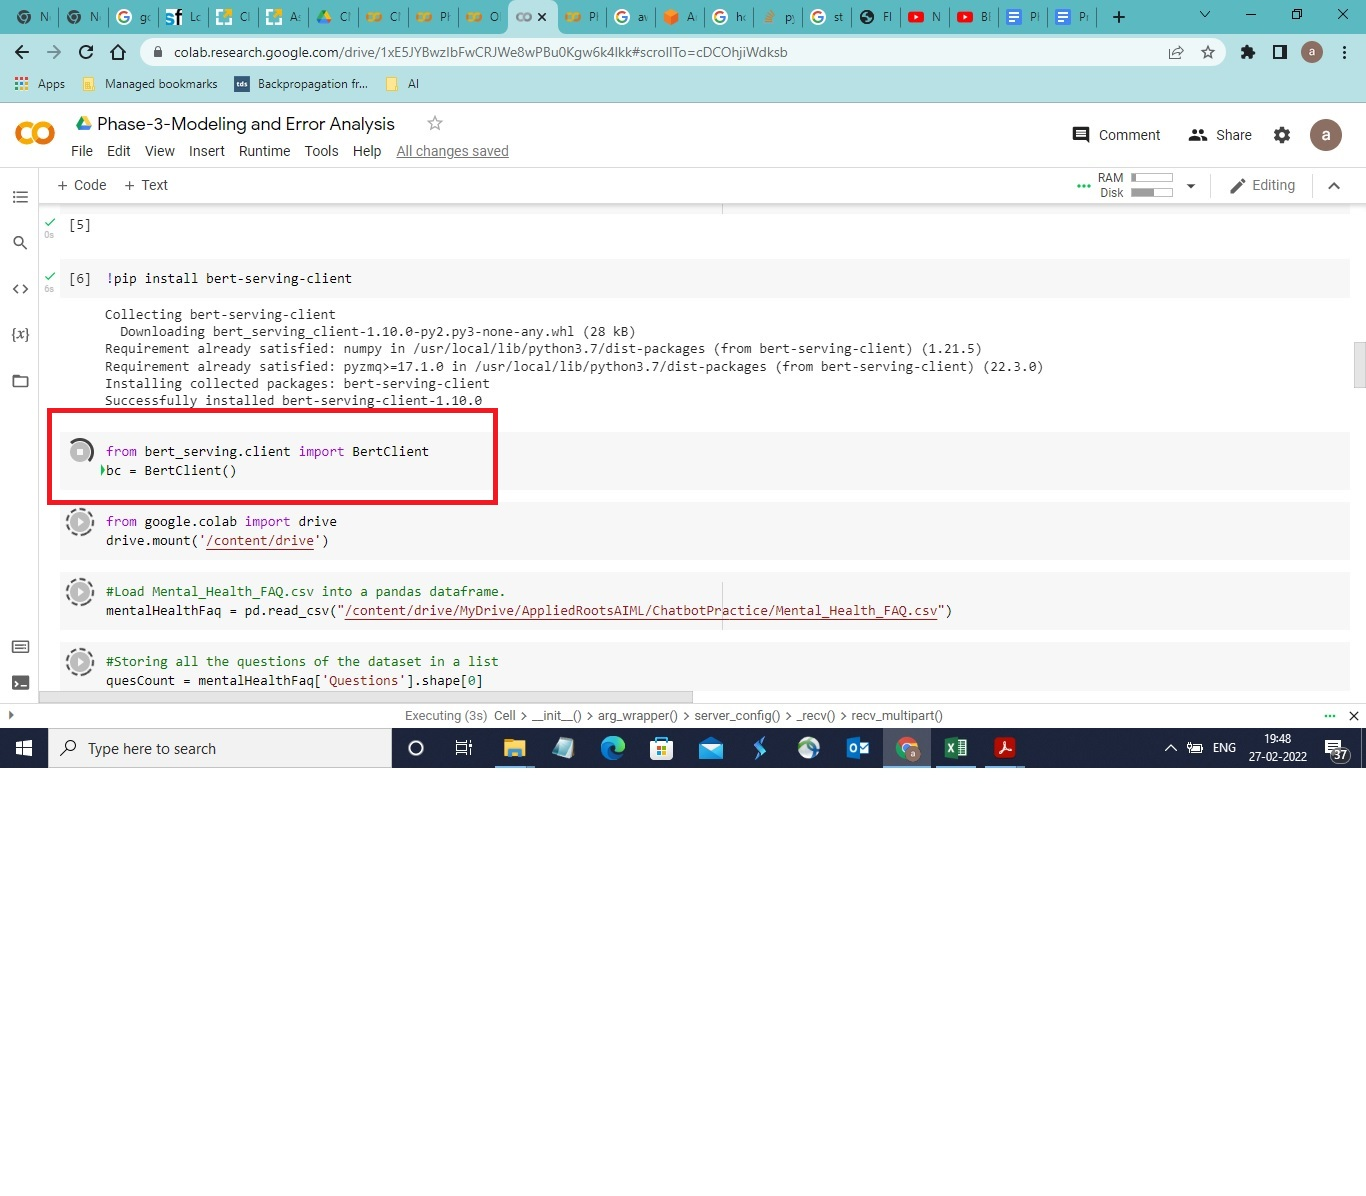

In [ ]:
#Variables
OpenAiAPIKey = "YOUR API KEY"
url = '/content/drive/MyDrive/AppliedRootsAIML/ChatbotPractice/'

1) Using Flask to create an API around the trained model.

2) Using ngrok to use flask on Google Colab.

In [ ]:
!pip install openai

Referred- 

To run flask on google colab:

1) https://www.youtube.com/watch?v=h6skw_h7Wg8

2) https://www.youtube.com/watch?v=7u0KBWlA-Dc

To create a HTML page:

https://codinginfinite.com/chatbot-in-python-flask-tutorial/

In [ ]:
import openai
import pandas as pd
import json
import time
openai.api_key = OpenAiAPIKey

In [ ]:
#Below is the code to perform question answering using file.
def answer(Question):
  answer = openai.Answer.create(
     search_model="ada",
     model="curie",
     question= Question,
     file= "file-tjksW00XtspZgy7TPrhzhoGC",
     examples_context="In 2017, U.S. life expectancy was 78.6 years.",
     examples=[["What is human life expectancy in the United States?","78 years."]],
     max_rerank=10,
     max_tokens=1500,
     stop=["\n", "<|endoftext|>"]
 
  )
  return answer.answers

In [ ]:
 pip install flask-ngrok

In [ ]:
#Download and install ngrok on the Google Colab Linux machine
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok   
              

deb https://ngrok-agent.s3.amazonaws.com buster main
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 https://ngrok-agent.s3.amazonaws.com buster InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease


In [ ]:
#Install Authentication token. This needs to be done only once.
#Mention the ngrok authentication token below like-   !ngrok authtoken 25NEoptY15Y1xOJAIOd3eDqJPKT_7fMBGbhDz2nVQgkQvB9Bx
!ngrok authtoken 25NEoptY15Y1xOJAIOd3eDqJPKT_7fMBGbhDz2nVQgkQvB9Bx

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, jsonify, render_template, request
import joblib
#from sklearn.externals import joblib
from bs4 import BeautifulSoup


#Running with Flask app
app = Flask(__name__ , template_folder = url)
#We need to start the ngrok when flask app is run
run_with_ngrok(app)

#define app routes
@app.route("/")
def index():
  return render_template("Chatbot.html")

@app.route("/get")
#function for the bot response
def get_bot_response():
    userText = request.args.get('msg')
    return str(answer(userText))

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://bbae-35-231-149-127.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [13/Mar/2022 18:38:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Mar/2022 18:38:38] "GET /static/style.css HTTP/1.1" 404 -
127.0.0.1 - - [13/Mar/2022 18:38:38] "GET /favicon.ico HTTP/1.1" 404 -


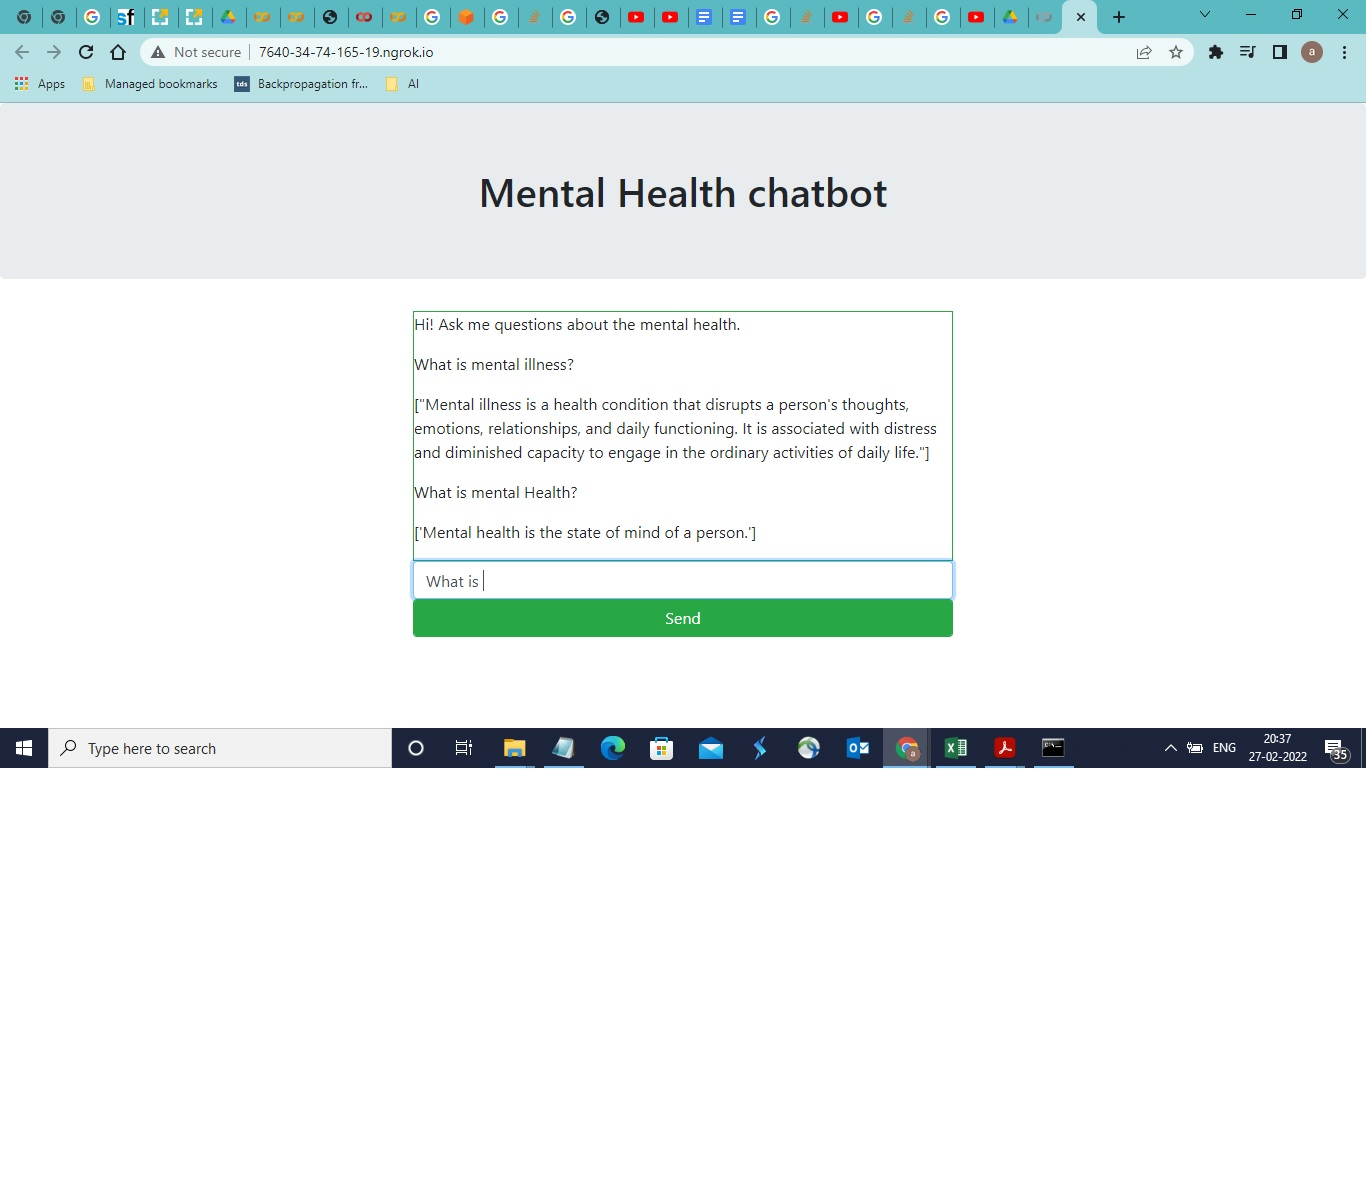